In [ ]:
import autograd.numpy as np
from autograd import grad, elementwise_grad
import autograd.numpy.random as npr
import matplotlib.pyplot as plt

In [ ]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def tanh(z):
    return np.tanh(z)

def relu(z):
    return np.maximum(0, z)

In [ ]:
# Assuming one input, hidden, and output layer
def neural_network(params, x):

    # Find the weights (including and biases) for the hidden and output layer.
    # Assume that params is a list of parameters for each layer.
    # The biases are the first element for each array in params,
    # and the weights are the remaning elements in each array in params.

    w_hidden = params[0]
    w_output = params[1]

    # Assumes input x being an one-dimensional array
    num_values = np.size(x)
    x = x.reshape(-1, num_values)

    # Assume that the input layer does nothing to the input x
    x_input = x

    ## Hidden layer:

    # Add a row of ones to include bias
    x_input = np.concatenate((np.ones((1,num_values)), x_input ), axis = 0)

    z_hidden = np.matmul(w_hidden, x_input)
    x_hidden = sigmoid(z_hidden)

    ## Output layer:

    # Include bias:
    x_hidden = np.concatenate((np.ones((1,num_values)), x_hidden ), axis = 0)

    z_output = np.matmul(w_output, x_hidden)
    x_output = z_output

    return x_output

In [ ]:
# The trial solution using the deep neural network:
def g_trial(x,params, g0 = 0.1):
    return g0 + (x**2)*neural_network(params,x)

In [ ]:
# The right side of the ODE:
def g(x, g_trial, dg_trial):
    return -0.5*dg_trial - 25*g_trial - 25*g_trial**3

In [ ]:
# The cost function:
def cost_function(P, x):

    # Evaluate the trial function with the current parameters P
    g_t = g_trial(x,P)

    # Find the derivative w.r.t x of the neural network
    #d_net_out = elementwise_grad(neural_network,1)(P,x)

    # Find the derivative w.r.t x of the trial function
    d_g_t = elementwise_grad(g_trial,0)(x,P)
    dd_g_t = elementwise_grad(elementwise_grad(g_trial,0))(x,P)

    # The right side of the ODE
    func = g(x, g_t, d_g_t)

    err_sqr = (dd_g_t - func)**2
    cost_sum = np.sum(err_sqr)

    return cost_sum / np.size(err_sqr)

In [ ]:
# Solve the exponential decay ODE using neural network with one input, hidden, and output layer
def solve_ode_neural_network(x, num_neurons_hidden, num_iter, lmb):
    ## Set up initial weights and biases

    # For the hidden layer
    p0 = npr.randn(num_neurons_hidden, 2 )

    # For the output layer
    p1 = npr.randn(1, num_neurons_hidden + 1 ) # +1 since bias is included

    P = [p0, p1]

    print('Initial cost: %g'%cost_function(P, x))

    ## Start finding the optimal weights using gradient descent

    # Find the Python function that represents the gradient of the cost function
    # w.r.t the 0-th input argument -- that is the weights and biases in the hidden and output layer
    cost_function_grad = grad(cost_function,0)

    # Let the update be done num_iter times
    for i in range(num_iter):
        # Evaluate the gradient at the current weights and biases in P.
        # The cost_grad consist now of two arrays;
        # one for the gradient w.r.t P_hidden and
        # one for the gradient w.r.t P_output
        cost_grad =  cost_function_grad(P, x)

        P[0] = P[0] - lmb * cost_grad[0]
        P[1] = P[1] - lmb * cost_grad[1]
        if i % 100 == 0:
            print('Final cost: %g'%cost_function(P, x))

    return P

In [ ]:
def g_analytic(x, gamma = 2, g0 = 10):
    return g0*np.exp(-gamma*x)

In [ ]:
# Solve the given problem
if __name__ == '__main__':
    # Set seed such that the weight are initialized
    # with same weights and biases for every run.
    npr.seed(15)

    ## Decide the vales of arguments to the function to solve
    N = 20
    x = np.linspace(0, 1, N)

    ## Set up the initial parameters
    num_hidden_neurons = 10
    num_iter = 10000
    lmb = 0.0001

    # Use the network
    P = solve_ode_neural_network(x, num_hidden_neurons, num_iter, lmb)

    # Print the deviation from the trial solution and true solution
    res = g_trial(x,P)
    res_analytical = g_analytic(x)

    print('Max absolute difference: %g'%np.max(np.abs(res - res_analytical)))

Initial cost: 3.75405
Final cost: 2.53617
Final cost: 0.634386
Final cost: 0.58959
Final cost: 0.55059
Final cost: 0.516592
Final cost: 0.486915
Final cost: 0.460981
Final cost: 0.438293
Final cost: 0.418423
Final cost: 0.401005
Final cost: 0.385721
Final cost: 0.372296
Final cost: 0.360495
Final cost: 0.35011
Final cost: 0.340965
Final cost: 0.332902
Final cost: 0.325788
Final cost: 0.319504
Final cost: 0.313949
Final cost: 0.309032
Final cost: 0.304674
Final cost: 0.300809
Final cost: 0.297375
Final cost: 0.294321
Final cost: 0.2916
Final cost: 0.289172
Final cost: 0.287001
Final cost: 0.285058
Final cost: 0.283314
Final cost: 0.281746
Final cost: 0.280333
Final cost: 0.279056
Final cost: 0.277899
Final cost: 0.276848
Final cost: 0.27589
Final cost: 0.275014
Final cost: 0.27421
Final cost: 0.273471
Final cost: 0.272787
Final cost: 0.272154
Final cost: 0.271564
Final cost: 0.271013
Final cost: 0.270496
Final cost: 0.270009
Final cost: 0.269549
Final cost: 0.269112
Final cost: 0.268696

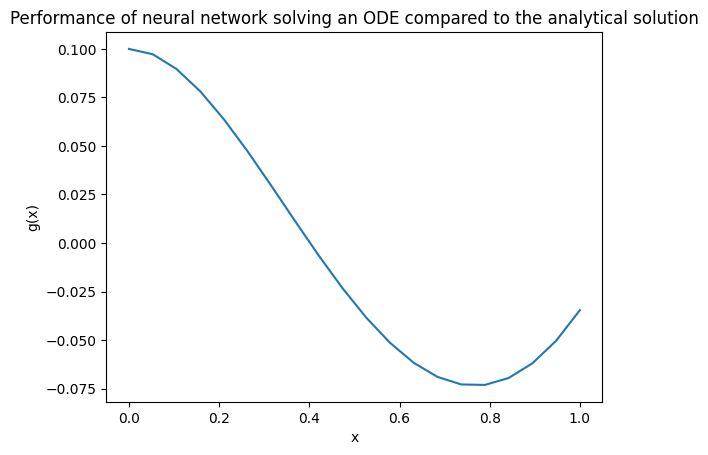

In [ ]:
# Plot the results

plt.title('Performance of neural network solving an ODE compared to the analytical solution')
#plt.plot(x, res_analytical)
plt.plot(x, res[0,:])
#plt.legend(['analytical','nn'])
plt.xlabel('x')
plt.ylabel('g(x)')
plt.show()